<a href="https://colab.research.google.com/github/JairDel/Proyecto-Clasificador/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset


SVC

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3   3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0   3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0   1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2   3.9   
5    6      6  2012           31  67  14   0.0  82.6  5.8  22.2  3.1   7.0   
6    7      6  2012           33  54  13   0.0  88.2  9.9  30.5  6.4  10.9   

   FWI      Classes  
0  0.5  not fire     
1  0.4  not fire     
2  0.1  not fire     
3  0.0  not fire     
4  0.5  not fire     
5  2.5      fire     
6  7.2      fire     
Accuracy: 0.96
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104
AUC: 1.0


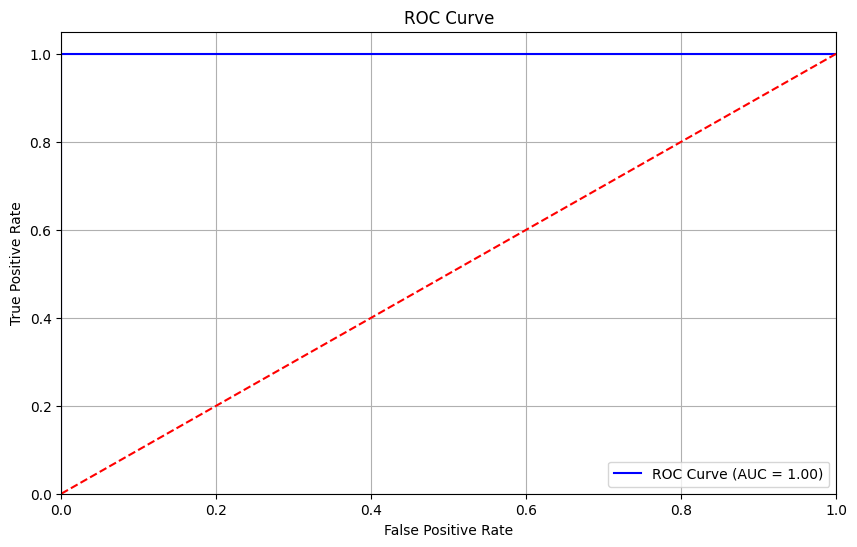

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

data = pd.read_csv('DATA SET.csv')
data.columns = data.columns.str.strip()
X = data.drop(columns=['day', 'month', 'year', 'Classes'])
y = data['Classes'].str.strip()

# fire=1, not fire=0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = X.apply(pd.to_numeric, errors='coerce')

print(data.head(7))

#dividir - entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

accuracySVM = accuracy_score(y_test, y_pred)
precisionSVM = precision_score(y_test, y_pred)
recallSVM = recall_score(y_test, y_pred)
f1SVM = f1_score(y_test, y_pred)

# AUC y roc
y_probs = best_svm.decision_function(X_test_scaled)
auc = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

print(f"Accuracy: {accuracySVM}")
print(f"Precision: {precisionSVM}")
print(f"Recall: {recallSVM}")
print(f"F1 Score: {f1SVM}")
print(f"AUC: {auc}")

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


DecisionTreeClassifier

Accuracy: 0.96
Precision: 1.0
Recall: 0.9285714285714286
F1 Score: 0.9629629629629629
AUC: 0.9642857142857143


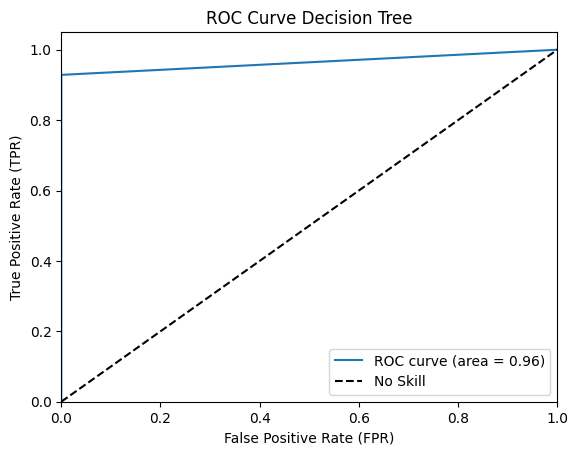

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_csv('DATA SET.csv')
data.columns = data.columns.str.strip()
X = data.drop(columns=['day', 'month', 'year', 'Classes'])
y = data['Classes'].str.strip()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = X.apply(pd.to_numeric, errors='coerce')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=X_train.shape[1])
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

dt_classifier = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test_pca)

accuracyDT = accuracy_score(y_test, y_pred)
precisionDT = precision_score(y_test, y_pred)
recallDT = recall_score(y_test, y_pred)
f1DT = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracyDT}")
print(f"Precision: {precisionDT}")
print(f"Recall: {recallDT}")
print(f"F1 Score: {f1DT}")

y_score = best_dt.predict_proba(X_test_pca)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Decision Tree')
plt.legend()
plt.show()


RandomForestClassifier

Accuracy: 0.96
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104
AUC: 0.9935064935064934


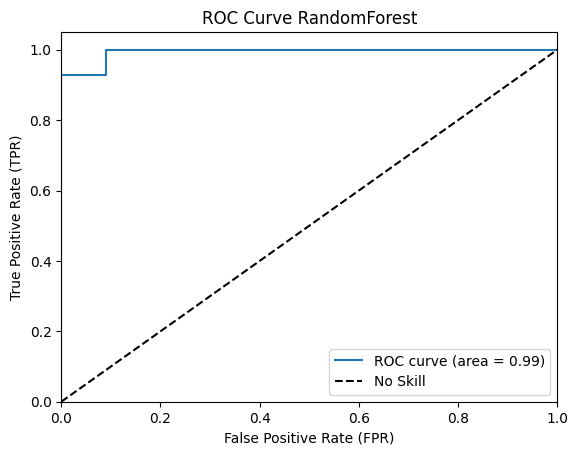

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('DATA SET.csv')
data.columns = data.columns.str.strip()

X = data.drop(columns=['day', 'month', 'year', 'Classes'])
y = data['Classes'].str.strip()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = X.apply(pd.to_numeric, errors='coerce')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.sample(frac=1, axis=1, random_state=42)
X_test = X_test[X_train.columns]

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

accuracyRF = accuracy_score(y_test, y_pred)
precisionRF = precision_score(y_test, y_pred)
recallRF = recall_score(y_test, y_pred)
f1RF = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracyRF}")
print(f"Precision: {precisionRF}")
print(f"Recall: {recallRF}")
print(f"F1 Score: {f1RF}")

y_score = best_rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve RandomForest')
plt.legend()
plt.show()


ExtraTreesClassifier

Accuracy: 0.92
Precision: 1.0
Recall: 0.8571428571428571
F1 Score: 0.9230769230769231
AUC: 0.9870129870129869


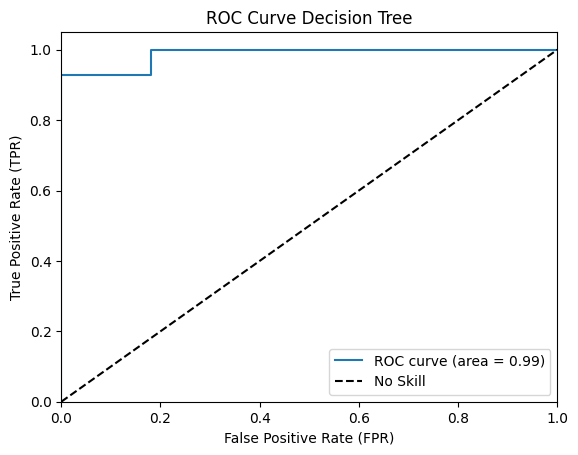

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize

data = pd.read_csv('DATA SET.csv')
data.columns = data.columns.str.strip()
X = data.drop(columns=['day', 'month', 'year', 'Classes'])
y = data['Classes'].str.strip()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = X.apply(pd.to_numeric, errors='coerce')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=X_train.shape[1])
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

et_classifier = ExtraTreesClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(et_classifier,param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

best_et_classifier = grid_search.best_estimator_
y_pred = best_et_classifier.predict(X_test_pca)

accuracyETC = accuracy_score(y_test, y_pred)
precisionETC = precision_score(y_test, y_pred)
recallETC = recall_score(y_test, y_pred)
f1ETC = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracyETC}")
print(f"Precision: {precisionETC}")
print(f"Recall: {recallETC}")
print(f"F1 Score: {f1ETC}")

y_score = best_et_classifier.predict_proba(X_test_pca)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Extra Trees')
plt.legend()
plt.show()




Link de Streamlit:https://proyecto-clasificador-355274.streamlit.app/